### Chapter 8:Functions

In [1]:
# Our first function definition

def double(x):
    """ Double x """
    return 2*x

In [2]:
double(5)

10

In [3]:
double(-0.6/4)

-0.3

In [4]:
any_name = 42
double(any_name)

84

In [10]:
import numpy as np
double(np.array([3,4,5]))

array([ 6,  8, 10])

In [11]:
x

NameError: name 'x' is not defined

In [12]:
def percent(x, total):
    """Convert x to a percentage of total.
    
    More precisely, this function divides x by total,
    multiplies the result by 100, and rounds the result
    to two decimal places.
    
    >>> percent(4, 16)
    25.0
    >>> percent(1, 6)
    16.67
    """
    return round((x/total)*100, 2)

In [13]:
percent(33, 200)

16.5

In [14]:
def percents(counts):
    """Convert the values in array_x to percents out of the total of array_x."""
    total = counts.sum()
    return np.round((counts/total)*100, 2)

In [15]:
some_array = np.array([7, 10, 4])
percents(some_array)

array([33.33, 47.62, 19.05])

In [17]:
def biggest_difference(array_x):
    """Find the biggest difference in absolute value between two adjacent elements of array_x."""
    diffs = np.diff(array_x)
    absolute_diffs = abs(diffs)
    return max(absolute_diffs)

some_numbers = np.array([2, 4, 5, 6, 4, -1, 1])
big_diff = biggest_difference(some_numbers)
print("The biggest difference is", big_diff)

The biggest difference is 5


In [18]:
def percents(counts, decimal_places):
    """Convert the values in array_x to percents out of the total of array_x."""
    total = counts.sum()
    return np.round((counts/total)*100, decimal_places)

parts = np.array([2, 1, 4])
print("Rounded to 1 decimal place: ", percents(parts, 1))
print("Rounded to 2 decimal places:", percents(parts, 2))
print("Rounded to 3 decimal places:", percents(parts, 3))

Rounded to 1 decimal place:  [28.6 14.3 57.1]
Rounded to 2 decimal places: [28.57 14.29 57.14]
Rounded to 3 decimal places: [28.571 14.286 57.143]


In [20]:
def percents(counts, decimal_places=2):
    """Convert the values in array_x to percents out of the total of array_x."""
    total = counts.sum()
    return np.round((counts/total)*100, decimal_places)

parts = np.array([2, 1, 4])
print("Rounded to 1 decimal place:", percents(parts, 1))
print("Rounded to the default number of decimal places:", percents(parts))

Rounded to 1 decimal place: [28.6 14.3 57.1]
Rounded to the default number of decimal places: [28.57 14.29 57.14]


#### Applying a Function to a Column 

In [21]:
def cut_off_at_100(x):
    """The smaller of x and 100"""
    return min(x, 100)

In [22]:
cut_off_at_100(17)

17

In [23]:
cut_off_at_100(117)

100

In [24]:
cut_off_at_100(100)

100

In [27]:
import pandas as pd
ages = pd.DataFrame({'Person':['A', 'B', 'C', 'D', 'E', 'F'],
    'Age':[17, 117, 52, 100, 6, 101]})
ages

,Person,Age
0,A,17
1,B,117
2,C,52
3,D,100
4,E,6
5,F,101


In [29]:
ages['Age'].apply(cut_off_at_100)

0     17
1    100
2     52
3    100
4      6
5    100
Name: Age, dtype: int64

In [31]:
ages['Cut Off Age']=ages['Age'].apply(cut_off_at_100)
ages

,Person,Age,Cut Off Age
0,A,17,17
1,B,117,100
2,C,52,52
3,D,100,100
4,E,6,6
5,F,101,100


#### Functions as Values 

In [32]:
cut_off_at_100

<function __main__.cut_off_at_100(x)>

In [33]:
cut_off = cut_off_at_100

In [34]:
cut_off

<function __main__.cut_off_at_100(x)>

In [37]:
galton=pd.read_csv('/home/ashly/Desktop/FDS/Lab Assignments/Lab FDS 7-10-20/CSV Files/galton.csv')
galton.head()

,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,1,78.5,67.0,75.43,4,1,male,73.2
1,1,78.5,67.0,75.43,4,2,female,69.2
2,1,78.5,67.0,75.43,4,3,female,69.0
3,1,78.5,67.0,75.43,4,4,female,69.0
4,2,75.5,66.5,73.66,4,1,male,73.5


In [54]:
heights=galton.loc[:,["midparentHeight","childHeight"]]
heights.rename(columns={'midparentHeight':'midparent','childHeight':'Child'},inplace=True)
heights

,midparent,Child
0,75.43,73.2
1,75.43,69.2
2,75.43,69.0
3,75.43,69.0
4,73.66,73.5
...,...,...
929,66.64,64.0
930,66.64,62.0
931,66.64,61.0
932,65.27,66.5


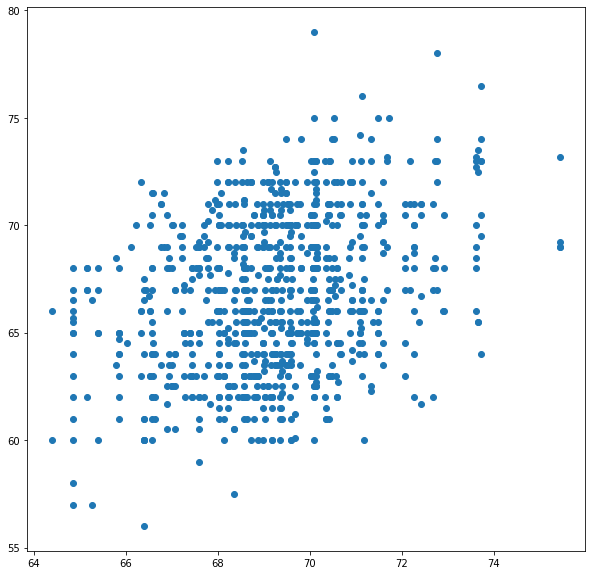

In [62]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(heights.midparent,heights.Child)

plt.show()

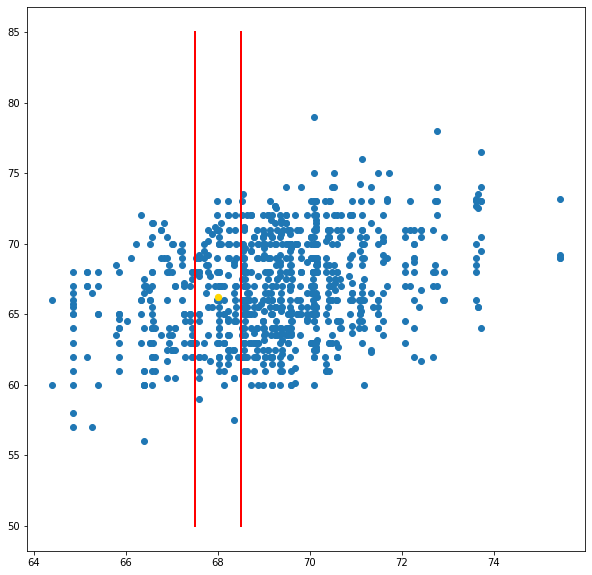

In [64]:
plt.figure(figsize=(10,10))
plt.scatter(heights.midparent,heights.Child)

plt.plot([67.5, 67.5], [50, 85], color='red', lw=2)
plt.plot([68.5, 68.5], [50, 85], color='red', lw=2)
plt.scatter(68, 66.24, color='gold', s=40)
plt.show()

In [71]:
close_to_68=heights[np.logical_and(heights['midparent']>67.5,heights['midparent']<68.5)]

In [73]:
close_to_68.Child.mean()

66.24045801526718

In [74]:
def predict_child(mpht):
    close_points =heights[np.logical_and(heights['midparent']>mpht-0.5,heights['midparent']<mpht+0.5)]
    return close_points.Child.mean()

In [75]:
predict_child(68)

66.24045801526718

In [76]:
predict_child(74)

70.41578947368421

In [77]:
heights['predictions']=heights['midparent'].apply(predict_child)
heights

,midparent,Child,predictions
0,75.43,73.2,70.100000
1,75.43,69.2,70.100000
2,75.43,69.0,70.100000
3,75.43,69.0,70.100000
4,73.66,73.5,70.415789
...,...,...,...
929,66.64,64.0,65.156579
930,66.64,62.0,65.156579
931,66.64,61.0,65.156579
932,65.27,66.5,64.229630


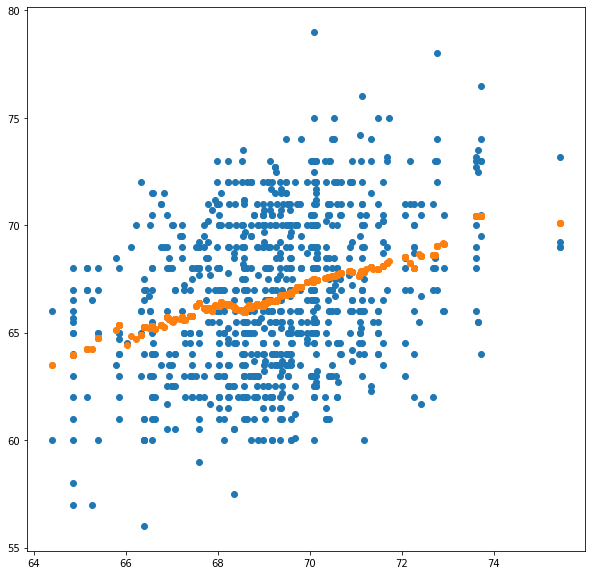

In [88]:
plt.figure(figsize=(10,10))
plt.scatter(heights.midparent,heights.Child)
plt.scatter(heights.midparent,heights.predictions)
plt.show()

#### Counting the Number in Each Category 

In [90]:
cones=pd.DataFrame({'Flavor':['strawberry', 'chocolate', 'chocolate', 'strawberry', 'chocolate'], 'Price':[3.55, 4.75, 6.55, 5.25, 5.25]})
cones


,Flavor,Price
0,strawberry,3.55
1,chocolate,4.75
2,chocolate,6.55
3,strawberry,5.25
4,chocolate,5.25


In [96]:
cones.groupby(by='Flavor').count()

,Price
Flavor,
chocolate,3
strawberry,2


In [97]:
cones.groupby(by='Flavor').sum()

,Price
Flavor,
chocolate,16.55
strawberry,8.80


In [100]:
cones.groupby(by='Flavor').max()

,Price
Flavor,
chocolate,6.55
strawberry,5.25


#### Example: NBA Salaries 

In [125]:
nba1=pd.read_csv('/home/ashly/Desktop/FDS/Lab Assignments/Lab FDS 7-10-20/CSV Files/nba_salaries.csv')
nba1=nba1.rename(columns={'2015-2016 SALARY':'Salary'})
nba1

,PLAYER,POSITION,TEAM,Salary
0,Paul Millsap,PF,Atlanta Hawks,18.671659
1,Al Horford,C,Atlanta Hawks,12.000000
2,Tiago Splitter,C,Atlanta Hawks,9.756250
3,Jeff Teague,PG,Atlanta Hawks,8.000000
4,Kyle Korver,SG,Atlanta Hawks,5.746479
...,...,...,...,...
412,Gary Neal,PG,Washington Wizards,2.139000
413,DeJuan Blair,C,Washington Wizards,2.000000
414,Kelly Oubre Jr.,SF,Washington Wizards,1.920240
415,Garrett Temple,SG,Washington Wizards,1.100602


In [136]:
teams_and_money=nba1[['TEAM','Salary']]
teams_and_money.groupby(by='TEAM').sum()

,Salary
TEAM,
Atlanta Hawks,69.573103
Boston Celtics,50.285499
Brooklyn Nets,57.306976
Charlotte Hornets,84.102397
Chicago Bulls,78.820890
Cleveland Cavaliers,102.312412
Dallas Mavericks,65.762559
Denver Nuggets,62.429404
Detroit Pistons,42.211760


In [150]:
no=nba1.groupby(by='POSITION').count()
no=no.drop(columns=['TEAM','Salary'])
no

,PLAYER
POSITION,
C,69
PF,85
PG,85
SF,82
SG,96


In [148]:
positions_and_money=nba1[['POSITION','Salary']]
positions_and_money.groupby(by='POSITION').mean()

,Salary
POSITION,
C,6.082913
PF,4.951344
PG,5.165487
SF,5.532675
SG,3.988195


In [151]:
nba1.groupby(by='POSITION').mean()

,Salary
POSITION,
C,6.082913
PF,4.951344
PG,5.165487
SF,5.532675
SG,3.988195


#### Cross-Classifying by More than One Variable 


In [154]:
more_cones = pd.DataFrame({'Flavor':['strawberry', 'chocolate', 'chocolate', 'strawberry', 'chocolate', 'bubblegum'],
    'Color': ['pink', 'light brown', 'dark brown', 'pink', 'dark brown', 'pink'],
    'Price':[3.55, 4.75, 5.25, 5.25, 5.25, 4.75]})


more_cones

,Flavor,Color,Price
0,strawberry,pink,3.55
1,chocolate,light brown,4.75
2,chocolate,dark brown,5.25
3,strawberry,pink,5.25
4,chocolate,dark brown,5.25
5,bubblegum,pink,4.75


In [159]:
de=more_cones.groupby(by='Flavor').count()
de.drop(columns='Price')

,Color
Flavor,
bubblegum,1
chocolate,3
strawberry,2


In [161]:
de1=more_cones.groupby(by=['Flavor','Color']).count()
de1

Price
Flavor     Color             
bubblegum  pink             1
chocolate  dark brown       2
           light brown      1
strawberry pink             2

In [175]:
ui=more_cones.groupby(by=['Flavor','Color']).sum()
ui

Price
Flavor     Color             
bubblegum  pink          4.75
chocolate  dark brown   10.50
           light brown   4.75
strawberry pink          8.80

In [184]:
de1.pivot_table(index='Color',columns='Flavor')

Price                     
Flavor      bubblegum chocolate strawberry
Color                                     
dark brown        NaN       2.0        NaN
light brown       NaN       1.0        NaN
pink              1.0       NaN        2.0

In [178]:
more_cones.pivot_table(index='Color',columns='Flavor',aggfunc=np.sum)

Price                     
Flavor      bubblegum chocolate strawberry
Color                                     
dark brown        NaN     10.50        NaN
light brown       NaN      4.75        NaN
pink             4.75       NaN        8.8

In [177]:
more_cones.groupby(by=['Flavor','Color']).sum()

Price
Flavor     Color             
bubblegum  pink          4.75
chocolate  dark brown   10.50
           light brown   4.75
strawberry pink          8.80

#### Example: Education and Income of Californian Adults 

In [186]:
full_table=pd.read_csv('/home/ashly/Desktop/FDS/Lab Assignments/Lab FDS 7-10-20/CSV Files/educ_inc.csv')
full_table

,Year,Age,Gender,Educational Attainment,Personal Income,Population Count
0,1/1/08 0:00,00 to 17,Male,"College, less than 4-yr degree","C: 10,000 to 14,999",1304
1,1/1/08 0:00,00 to 17,Female,"College, less than 4-yr degree","B: 5,000 to 9,999",1565
2,1/1/08 0:00,65 to 80+,Male,"College, less than 4-yr degree","A: 0 to 4,999",1923
3,1/1/08 0:00,65 to 80+,Female,No high school diploma,"H: 75,000 and over",1981
4,1/1/08 0:00,00 to 17,Female,No high school diploma,"D: 15,000 to 24,999",2009
...,...,...,...,...,...,...
1021,1/1/14 0:00,18 to 64,Female,High school or equivalent,"A: 0 to 4,999",670294
1022,1/1/14 0:00,18 to 64,Male,Bachelor's degree or higher,"G: 50,000 to 74,999",682425
1023,1/1/14 0:00,18 to 64,Female,No high school diploma,"A: 0 to 4,999",723208
1024,1/1/14 0:00,18 to 64,Female,Bachelor's degree or higher,"H: 75,000 and over",953282


In [188]:
ca_2014=full_table[np.logical_and(full_table['Year']=="1/1/14 0:00",full_table['Age']!='00 to 17')]
ca_2014

,Year,Age,Gender,Educational Attainment,Personal Income,Population Count
885,1/1/14 0:00,18 to 64,Female,No high school diploma,"H: 75,000 and over",2058
886,1/1/14 0:00,65 to 80+,Male,No high school diploma,"H: 75,000 and over",2153
894,1/1/14 0:00,65 to 80+,Female,No high school diploma,"G: 50,000 to 74,999",4666
895,1/1/14 0:00,65 to 80+,Female,High school or equivalent,"H: 75,000 and over",7122
896,1/1/14 0:00,65 to 80+,Female,No high school diploma,"F: 35,000 to 49,999",7261
...,...,...,...,...,...,...
1021,1/1/14 0:00,18 to 64,Female,High school or equivalent,"A: 0 to 4,999",670294
1022,1/1/14 0:00,18 to 64,Male,Bachelor's degree or higher,"G: 50,000 to 74,999",682425
1023,1/1/14 0:00,18 to 64,Female,No high school diploma,"A: 0 to 4,999",723208
1024,1/1/14 0:00,18 to 64,Female,Bachelor's degree or higher,"H: 75,000 and over",953282


In [190]:
educ_inc = ca_2014[['Educational Attainment', 'Personal Income', 'Population Count']]
educ_inc

,Educational Attainment,Personal Income,Population Count
885,No high school diploma,"H: 75,000 and over",2058
886,No high school diploma,"H: 75,000 and over",2153
894,No high school diploma,"G: 50,000 to 74,999",4666
895,High school or equivalent,"H: 75,000 and over",7122
896,No high school diploma,"F: 35,000 to 49,999",7261
...,...,...,...
1021,High school or equivalent,"A: 0 to 4,999",670294
1022,Bachelor's degree or higher,"G: 50,000 to 74,999",682425
1023,No high school diploma,"A: 0 to 4,999",723208
1024,Bachelor's degree or higher,"H: 75,000 and over",953282


In [197]:
education = educ_inc[['Educational Attainment', 'Population Count']]
y=education.groupby(by='Educational Attainment').sum()
y

,Population Count
Educational Attainment,
Bachelor's degree or higher,8525698
"College, less than 4-yr degree",7775497
High school or equivalent,6294141
No high school diploma,4258277


In [195]:
def percents(array_x):
    return np.round( (array_x/sum(array_x))*100, 2)

In [203]:
y['Population Percent']=percents(y['Population Count'])
y

,Population Count,Population Percent
Educational Attainment,,
Bachelor's degree or higher,8525698,31.75
"College, less than 4-yr degree",7775497,28.96
High school or equivalent,6294141,23.44
No high school diploma,4258277,15.86


In [235]:
totals = educ_inc.pivot_table(columns='Educational Attainment',index='Personal Income', values='Population Count', aggfunc=np.sum)
totals1=totals
totals1

Educational Attainment,Bachelor's degree or higher,"College, less than 4-yr degree",High school or equivalent,No high school diploma
Personal Income,,,,
"A: 0 to 4,999",575491,985011,1161873,1204529
"B: 5,000 to 9,999",326020,810641,626499,597039
"C: 10,000 to 14,999",452449,798596,692661,664607
"D: 15,000 to 24,999",773684,1345257,1252377,875498
"E: 25,000 to 34,999",693884,1091642,929218,464564
"F: 35,000 to 49,999",1122791,1112421,782804,260579
"G: 50,000 to 74,999",1594681,883826,525517,132516
"H: 75,000 and over",2986698,748103,323192,58945


In [236]:
totals["Bachelor's degree or higher"] = percents(totals["Bachelor's degree or higher"])
totals["College, less than 4-yr degree"] = percents(totals["College, less than 4-yr degree"])
totals["High school or equivalent"] = percents(totals["High school or equivalent"])
totals["No high school diploma"] = percents(totals["No high school diploma"])

    
totals

Educational Attainment,Bachelor's degree or higher,"College, less than 4-yr degree",High school or equivalent,No high school diploma
Personal Income,,,,
"A: 0 to 4,999",6.75,12.67,18.46,28.29
"B: 5,000 to 9,999",3.82,10.43,9.95,14.02
"C: 10,000 to 14,999",5.31,10.27,11.00,15.61
"D: 15,000 to 24,999",9.07,17.30,19.90,20.56
"E: 25,000 to 34,999",8.14,14.04,14.76,10.91
"F: 35,000 to 49,999",13.17,14.31,12.44,6.12
"G: 50,000 to 74,999",18.70,11.37,8.35,3.11
"H: 75,000 and over",35.03,9.62,5.13,1.38


#### Joining Tables by Columns

In [2]:
import pandas as pd
cones = pd.DataFrame({'Flavor':['strawberry', 'vanilla', 'chocolate', 'strawberry', 'chocolate'],
    
    'Price':[3.55, 4.75, 6.55, 5.25, 5.75]})


cones

,Flavor,Price
0,strawberry,3.55
1,vanilla,4.75
2,chocolate,6.55
3,strawberry,5.25
4,chocolate,5.75


In [4]:
ratings = pd.DataFrame({'Kind':['strawberry', 'chocolate', 'vanilla'],
    'Stars':[2.5, 3.5, 4]})
ratings

,Kind,Stars
0,strawberry,2.5
1,chocolate,3.5
2,vanilla,4.0


In [58]:
rated=cones.join(ratings.set_index('Kind'),on='Flavor').reset_index()
#con = cones.merge(cones,ratings,left_index=True,right_index=True)
rated

,index,Flavor,Price,Stars
0,0,strawberry,3.55,2.5
1,1,vanilla,4.75,4.0
2,2,chocolate,6.55,3.5
3,3,strawberry,5.25,2.5
4,4,chocolate,5.75,3.5


In [59]:
rated['$/Star']=rated['Price']/rated['Stars']
rated

,index,Flavor,Price,Stars,$/Star
0,0,strawberry,3.55,2.5,1.420000
1,1,vanilla,4.75,4.0,1.187500
2,2,chocolate,6.55,3.5,1.871429
3,3,strawberry,5.25,2.5,2.100000
4,4,chocolate,5.75,3.5,1.642857


In [69]:
ratings.join(cones.set_index('Flavor'),on='Kind').reset_index()

,index,Kind,Stars,Price
0,0,strawberry,2.5,3.55
1,0,strawberry,2.5,5.25
2,1,chocolate,3.5,6.55
3,1,chocolate,3.5,5.75
4,2,vanilla,4.0,4.75


In [70]:
reviews = pd.DataFrame({'Flavor':['vanilla', 'chocolate', 'vanilla', 'chocolate'],
    'Stars':[5, 3, 5, 4]})

reviews

,Flavor,Stars
0,vanilla,5
1,chocolate,3
2,vanilla,5
3,chocolate,4


In [73]:
average_review = reviews.groupby(by='Flavor').mean()
average_review

,Stars
Flavor,
chocolate,3.5
vanilla,5.0


In [77]:
cones.join(average_review,on='Flavor',how='inner')

,Flavor,Price,Stars
1,vanilla,4.75,5.0
2,chocolate,6.55,3.5
4,chocolate,5.75,3.5


#### Bike Sharing in the Bay Area 


In [37]:
trips=pd.read_csv('C:/Users/ashme/Mtech AI/FDS/Lab Assignments/Excercise 3Lab FDS 7-10-20/CSV Files/trip.csv')
trips.head()

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
0,913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
1,913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032
2,913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107
3,913454,409,8/31/2015 23:10,San Jose City Hall,10,8/31/2015 23:17,San Salvador at 1st,8,68,Subscriber,95113
4,913453,789,8/31/2015 23:09,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,487,Customer,9069


(array([34319., 89122., 86000., 60827., 34632., 16153.,  7473.,  4438.,
         3175.,  2204.]),
 array([  60. ,  233.9,  407.8,  581.7,  755.6,  929.5, 1103.4, 1277.3,
        1451.2, 1625.1, 1799. ]),
 <BarContainer object of 10 artists>)

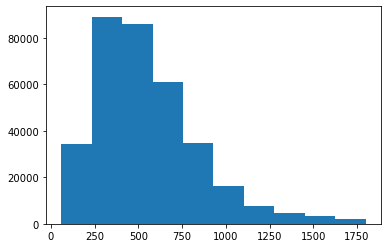

In [38]:
import matplotlib.pyplot as plt
commute= trips[trips['Duration']<1800]
plt.hist(commute.Duration)

(array([  862.,  1849.,  3408.,  5728.,  9446., 13026., 14185., 14453.,
        14595., 15065., 15513., 15311., 15222., 15279., 14822., 14316.,
        13468., 12893., 11808., 11500., 10624.,  9747.,  8802.,  8346.,
         7511.,  6761.,  6100.,  5323.,  4724.,  4213.,  3668.,  3180.,
         2817.,  2469.,  2158.,  1861.,  1645.,  1473.,  1273.,  1138.,
         1010.,   934.,   891.,   805.,   733.,   707.,   652.,   650.,
          565.,   598.,   560.,   504.,   529.,   419.,   432.,   410.,
          404.,   343.,   313.,   302.]),
 array([  60.        ,   88.98333333,  117.96666667,  146.95      ,
         175.93333333,  204.91666667,  233.9       ,  262.88333333,
         291.86666667,  320.85      ,  349.83333333,  378.81666667,
         407.8       ,  436.78333333,  465.76666667,  494.75      ,
         523.73333333,  552.71666667,  581.7       ,  610.68333333,
         639.66666667,  668.65      ,  697.63333333,  726.61666667,
         755.6       ,  784.58333333,  813.566

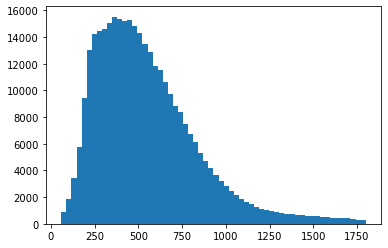

In [39]:
plt.hist(commute.Duration,bins=60)

#### Exploring the Data with group and pivot

In [40]:
starts = commute.groupby(by='Start Station').count()
starts=starts.sort_values(by='Zip Code',ascending=False)
starts[['Zip Code']]


,Zip Code
Start Station,
San Francisco Caltrain (Townsend at 4th),25849
San Francisco Caltrain 2 (330 Townsend),21521
Harry Bridges Plaza (Ferry Building),15522
Temporary Transbay Terminal (Howard at Beale),14296
2nd at Townsend,13666
...,...
Mezes Park,189
Redwood City Medical Center,139
San Mateo County Center,108


In [41]:
rewq=commute.groupby(by=['Start Station','End Station']).count()
rewq[['Zip Code']]

Zip Code
Start Station                                 End Station                                            
2nd at Folsom                                 2nd at Folsom                                        54
                                              2nd at South Park                                   294
                                              2nd at Townsend                                     437
                                              5th at Howard                                       113
                                              Beale at Market                                     127
...                                                                                               ...
Yerba Buena Center of the Arts (3rd @ Howard) Steuart at Market                                   201
                                              Temporary Transbay Terminal (Howard at Beale)       113
                                              Townsend at 7th                                     261
                                              Washington at Kearny                                 66
                                              Yerba Buena Center of the Arts (3rd @ Howard)        72

[1629 rows x 1 columns]

In [42]:
rewq.pivot_table(columns='Start Station',index='End Station')


Bike #                    \
Start Station                                 2nd at Folsom 2nd at South Park   
End Station                                                                     
2nd at Folsom                                          54.0             190.0   
2nd at South Park                                     295.0             164.0   
2nd at Townsend                                       437.0             151.0   
5th at Howard                                         113.0             177.0   
Adobe on Almaden                                        NaN               NaN   
...                                                     ...               ...   
Temporary Transbay Terminal (Howard at Beale)         414.0             437.0   
Townsend at 7th                                       347.0             309.0   
University and Emerson                                  NaN               NaN   
Washington at Kearny                                  142.0             142.0   
Yerba Buena Center of the Arts (3rd @ Howard)          83.0             180.0   

                                                                             \
Start Station                                 2nd at Townsend 5th at Howard   
End Station                                                                   
2nd at Folsom                                           554.0         107.0   
2nd at South Park                                        71.0         180.0   
2nd at Townsend                                         185.0          92.0   
5th at Howard                                           148.0          83.0   
Adobe on Almaden                                          NaN           NaN   
...                                                       ...           ...   
Temporary Transbay Terminal (Howard at Beale)           486.0         561.0   
Townsend at 7th                                         418.0         313.0   
University and Emerson                                    NaN           NaN   
Washington at Kearny                                     72.0          47.0   
Yerba Buena Center of the Arts (3rd @ Howard)           174.0          90.0   

                                                                \
Start Station                                 Adobe on Almaden   
End Station                                                      
2nd at Folsom                                              NaN   
2nd at South Park                                          NaN   
2nd at Townsend                                            NaN   
5th at Howard                                              NaN   
Adobe on Almaden                                          11.0   
...                                                        ...   
Temporary Transbay Terminal (Howard at Beale)              NaN   
Townsend at 7th                                            NaN   
University and Emerson                                     NaN   
Washington at Kearny                                       NaN   
Yerba Buena Center of the Arts (3rd @ Howard)              NaN   

                                                                        \
Start Station                                 Arena Green / SAP Center   
End Station                                                              
2nd at Folsom                                                      NaN   
2nd at South Park                                                  NaN   
2nd at Townsend                                                    NaN   
5th at Howard                                                      NaN   
Adobe on Almaden                                                   4.0   
...                                                                ...   
Temporary Transbay Terminal (Howard at Beale)                      NaN   
Townsend at 7th                                                    NaN   
University and Emerson                                             NaN  

In [43]:
import numpy as np
commute.pivot_table(columns='Start Station',index= 'End Station', values='Duration',aggfunc= np.min)

Start Station,2nd at Folsom,2nd at South Park,2nd at Townsend,5th at Howard,Adobe on Almaden,Arena Green / SAP Center,Beale at Market,Broadway St at Battery St,California Ave Caltrain Station,Castro Street and El Camino Real,...,South Van Ness at Market,Spear at Folsom,St James Park,Stanford in Redwood City,Steuart at Market,Temporary Transbay Terminal (Howard at Beale),Townsend at 7th,University and Emerson,Washington at Kearny,Yerba Buena Center of the Arts (3rd @ Howard)
End Station,,,,,,,,,,,,,,,,,,,,,
2nd at Folsom,61.0,97.0,164.0,268.0,NaN,NaN,271.0,407.0,NaN,NaN,...,590.0,208.0,NaN,NaN,318.0,149.0,448.0,NaN,429.0,165.0
2nd at South Park,61.0,60.0,77.0,86.0,NaN,NaN,78.0,345.0,NaN,NaN,...,399.0,63.0,NaN,NaN,79.0,61.0,78.0,NaN,270.0,96.0
2nd at Townsend,137.0,67.0,60.0,423.0,NaN,NaN,311.0,469.0,NaN,NaN,...,777.0,241.0,NaN,NaN,291.0,249.0,259.0,NaN,610.0,284.0
5th at Howard,215.0,300.0,384.0,68.0,NaN,NaN,357.0,530.0,NaN,NaN,...,375.0,402.0,NaN,NaN,455.0,265.0,357.0,NaN,553.0,109.0
Adobe on Almaden,NaN,NaN,NaN,NaN,84.0,275.0,NaN,NaN,NaN,NaN,...,NaN,NaN,369.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Temporary Transbay Terminal (Howard at Beale),112.0,195.0,261.0,279.0,NaN,NaN,68.0,261.0,NaN,NaN,...,647.0,137.0,NaN,NaN,139.0,60.0,542.0,NaN,311.0,226.0
Townsend at 7th,399.0,324.0,319.0,330.0,NaN,NaN,614.0,822.0,NaN,NaN,...,351.0,514.0,NaN,NaN,624.0,534.0,61.0,NaN,817.0,432.0
University and Emerson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,592.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.0,NaN,NaN


#### Drawing Maps 


In [2]:
import pandas as pd
stations=pd.read_csv('C:/Users/ashme/Mtech AI/FDS/Lab Assignments/Excercise 3Lab FDS 7-10-20/CSV Files/station.csv')
stations

,station_id,name,lat,long,dockcount,landmark,installation
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013
...,...,...,...,...,...,...,...
65,77,Market at Sansome,37.789625,-122.400811,27,San Francisco,8/25/2013
66,80,Santa Clara County Civic Center,37.352601,-121.905733,15,San Jose,12/31/2013
67,82,Broadway St at Battery St,37.798541,-122.400862,15,San Francisco,1/22/2014
68,83,Mezes Park,37.491269,-122.236234,15,Redwood City,2/20/2014


In [3]:
map_stations=stations[['lat', 'long', 'name']]
map_stations

,lat,long,name
0,37.329732,-121.901782,San Jose Diridon Caltrain Station
1,37.330698,-121.888979,San Jose Civic Center
2,37.333988,-121.894902,Santa Clara at Almaden
3,37.331415,-121.893200,Adobe on Almaden
4,37.336721,-121.894074,San Pedro Square
...,...,...,...
65,37.789625,-122.400811,Market at Sansome
66,37.352601,-121.905733,Santa Clara County Civic Center
67,37.798541,-122.400862,Broadway St at Battery St
68,37.491269,-122.236234,Mezes Park


In [4]:
#Drawing a Map
import folium
#Testing
map = folium.Map(location=[38.33, -121.90], zoom_start=10)
locations = map_stations[['lat', 'long']]
locationlist = locations.values.tolist()
for point in range(len(map_stations)):
    folium.Marker(locationlist[point], popup=map_stations['name'][point]).add_to(map)
map

In [5]:
sf = stations[stations['landmark']=='San Francisco']
location=sf[['lat','long']]
location=location.values.tolist()
map1=folium.Map(location=[37.78,-122.40],zoom_start=13)
for i in range(len(location)):
    folium.Circle(radius=200,location=location[i],popup=sf['name'],color='green',fill=True).add_to(map1)
map1


#### More Informative Maps: An Application of join

In [29]:
cities = stations.groupby(by='landmark').count()
v_city=cities[['name']]
v_city

,name
landmark,
Mountain View,7
Palo Alto,5
Redwood City,7
San Francisco,35
San Jose,16


In [30]:

v_city['color']=['blue', 'red', 'green', 'orange', 'purple']
v_city

<ipython-input-30-68ed8de64896>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v_city['color']=['blue', 'red', 'green', 'orange', 'purple']


,name,color
landmark,,
Mountain View,7,blue
Palo Alto,5,red
Redwood City,7,green
San Francisco,35,orange
San Jose,16,purple


In [31]:
#Start here
map_stations1=stations[['lat', 'long', 'name','landmark']]
v_city=v_city.reset_index()
v_city



,landmark,name,color
0,Mountain View,7,blue
1,Palo Alto,5,red
2,Redwood City,7,green
3,San Francisco,35,orange
4,San Jose,16,purple


In [23]:
#map_stations1.set_index('landmark',inplace=True)
#v_city.set_index('landmark',inplace=True)

In [32]:
joined=pd.merge(map_stations1,v_city,on='landmark',how='outer')
joined

,lat,long,name_x,landmark,name_y,color
0,37.329732,-121.901782,San Jose Diridon Caltrain Station,San Jose,16,purple
1,37.330698,-121.888979,San Jose Civic Center,San Jose,16,purple
2,37.333988,-121.894902,Santa Clara at Almaden,San Jose,16,purple
3,37.331415,-121.893200,Adobe on Almaden,San Jose,16,purple
4,37.336721,-121.894074,San Pedro Square,San Jose,16,purple
...,...,...,...,...,...,...
65,37.794139,-122.394434,Steuart at Market,San Francisco,35,orange
66,37.791300,-122.399051,Mechanics Plaza (Market at Battery),San Francisco,35,orange
67,37.786305,-122.404966,Market at 4th,San Francisco,35,orange
68,37.789625,-122.400811,Market at Sansome,San Francisco,35,orange


In [34]:
map2 = folium.Map(location=[38.33, -121.90], zoom_start=10)
locations = map_stations[['lat', 'long']]
locationlist = locations.values.tolist()
for point in range(len(joined)):
    folium.Marker(locationlist[point], popup=joined['landmark'][point],icon=folium.Icon(color=joined['color'][point])).add_to(map2)
map2

In [89]:
starts=commute.groupby(by='Start Station').count()
starts=starts.sort_values(by='Zip Code',ascending=False)
starts.reset_index(inplace=True)
starts.rename(columns={'Zip Code':'Count','Start Station':'name'},inplace=True)
starts=starts[['name','Count']]

starts


,name,Count
0,San Francisco Caltrain (Townsend at 4th),25849
1,San Francisco Caltrain 2 (330 Townsend),21521
2,Harry Bridges Plaza (Ferry Building),15522
3,Temporary Transbay Terminal (Howard at Beale),14296
4,2nd at Townsend,13666
...,...,...
65,Mezes Park,189
66,Redwood City Medical Center,139
67,San Mateo County Center,108
68,Redwood City Public Library,101


In [90]:
stations

,station_id,name,lat,long,dockcount,landmark,installation
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013
...,...,...,...,...,...,...,...
65,77,Market at Sansome,37.789625,-122.400811,27,San Francisco,8/25/2013
66,80,Santa Clara County Civic Center,37.352601,-121.905733,15,San Jose,12/31/2013
67,82,Broadway St at Battery St,37.798541,-122.400862,15,San Francisco,1/22/2014
68,83,Mezes Park,37.491269,-122.236234,15,Redwood City,2/20/2014


In [91]:
station_starts=pd.merge(stations,starts, on=['name'],how='outer')
station_starts.head()
station_starts.dropna(inplace=True)
station_starts.reset_index(inplace=True)
station_starts

,index,station_id,name,lat,long,dockcount,landmark,installation,Count
0,0,2.0,San Jose Diridon Caltrain Station,37.329732,-121.901782,27.0,San Jose,8/6/2013,4899.0
1,1,3.0,San Jose Civic Center,37.330698,-121.888979,15.0,San Jose,8/5/2013,574.0
2,2,4.0,Santa Clara at Almaden,37.333988,-121.894902,11.0,San Jose,8/6/2013,1884.0
3,3,5.0,Adobe on Almaden,37.331415,-121.893200,19.0,San Jose,8/5/2013,522.0
4,4,6.0,San Pedro Square,37.336721,-121.894074,15.0,San Jose,8/7/2013,1321.0
...,...,...,...,...,...,...,...,...,...
63,65,77.0,Market at Sansome,37.789625,-122.400811,27.0,San Francisco,8/25/2013,11019.0
64,66,80.0,Santa Clara County Civic Center,37.352601,-121.905733,15.0,San Jose,12/31/2013,510.0
65,67,82.0,Broadway St at Battery St,37.798541,-122.400862,15.0,San Francisco,1/22/2014,7460.0
66,68,83.0,Mezes Park,37.491269,-122.236234,15.0,Redwood City,2/20/2014,189.0


In [101]:
starts_map_data=station_starts[['lat','long','name']]
starts_map_data['area']=station_starts['Count']*1000
starts_map_data

<ipython-input-101-715ae0a6f49e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  starts_map_data['area']=station_starts['Count']*1000


,lat,long,name,area
0,37.329732,-121.901782,San Jose Diridon Caltrain Station,4899000.0
1,37.330698,-121.888979,San Jose Civic Center,574000.0
2,37.333988,-121.894902,Santa Clara at Almaden,1884000.0
3,37.331415,-121.893200,Adobe on Almaden,522000.0
4,37.336721,-121.894074,San Pedro Square,1321000.0
...,...,...,...,...
63,37.789625,-122.400811,Market at Sansome,11019000.0
64,37.352601,-121.905733,Santa Clara County Civic Center,510000.0
65,37.798541,-122.400862,Broadway St at Battery St,7460000.0
66,37.491269,-122.236234,Mezes Park,189000.0


In [109]:
starts_map_data['area']=station_starts['Count']*0.1

<ipython-input-109-7c1933c53fbd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  starts_map_data['area']=station_starts['Count']*0.1


In [106]:
map3 = folium.Map(location=[38.32, -121.90], zoom_start=10)
locations = starts_map_data[['lat', 'long']]
locationlist = locations.values.tolist()
for point in range(len(starts_map_data)):
    folium.Circle(radius=starts_map_data['area'][point], 
                  location=locationlist[point], 
                  popup=starts_map_data['name'][point],
                  fill=True,
                  colour='blue').add_to(map3)
map3

Chapter 8 Completed